In [1]:
import re, os
import pandas as pd
import datetime
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from matplotlib import pyplot as plt
import plotData # helper function in starter code package

# EDA

In [2]:
resp_test_status = {}
for root, dirs, files in os.walk("../dataPackage/"):
  for file in files:
    try:
      if re.search("^sub-(cp\d+)", file) != None and re.search("task-(\w+)_", file) != None:
        subject = re.search("^sub-(cp\d+)", file).group(1)
        rest_ils = re.search("task-(\w+)_", file).group(1)
        if subject not in resp_test_status:
          resp_test_status[subject] = {'ils_lslrespitrace':0, 'rest_lslrespitrace':0, 'ils_lslshimmerresp':0, 'rest_lslshimmerresp':0}
        if 'lslrespitrace' in file and 'dat.csv' in file:
          resp_test_status[subject][rest_ils+'_lslrespitrace'] += 1
        if 'lslshimmerresp' in file and 'dat.csv' in file:
          resp_test_status[subject][rest_ils+'_lslshimmerresp'] += 1
    except:
      print(file)

In [3]:
pd.DataFrame(resp_test_status).T

,ils_lslrespitrace,rest_lslrespitrace,ils_lslshimmerresp,rest_lslshimmerresp
cp003,0,0,12,2
cp004,0,0,12,2
cp005,0,0,12,2
cp006,0,0,12,2
cp008,0,0,12,2
cp009,0,0,12,1
cp011,0,0,12,2
cp012,0,0,12,2
cp013,0,0,12,2
cp014,12,2,12,2


lslrespitrace is not used on all subjects. Hence, we will only use lslshimmerresp for respiratory analysis

In [4]:
resp_test_len = {'subject':[],'rest/ils':[],'level':[],'run':[],'len':[],}
for root, dirs, files in os.walk("..\\dataPackage\\"):
  for file in files:
    try:
      if 'lslshimmerresp' in file and 'dat.csv' in file:
        resp_test_len["subject"].append(re.search("^sub-(cp\d+)", file).group(1))
        resp_test_len["rest/ils"].append(re.search("task-(\w+)_", file).group(1))
        resp_test_len["level"].append(re.search("level-(\d\d\w)", file).group(1))
        resp_test_len["run"].append(re.search("run-(\d{3})", file).group(1))
        resp_test_len["len"].append(len(pd.read_csv(os.path.join(root, file))))
    except:
      print(file)

In [5]:
df_resp_test_len = pd.DataFrame(resp_test_len)
df_resp_test_len

,subject,rest/ils,level,run,len
0,cp003,ils,01B,001,269979
1,cp003,ils,01B,007,237732
2,cp003,ils,01B,012,239005
3,cp003,ils,02B,003,262044
4,cp003,ils,02B,008,257882
...,...,...,...,...,...
482,cp039,rest,000,002,38993
483,cp042,rest,000,001,46988
484,cp042,rest,000,002,38724
485,cp043,rest,000,001,42449


In [6]:
with pd.option_context("display.max_rows", 1000):
  display(df_resp_test_len.groupby(["subject", "level"]).count())

rest/ils  run  len
subject level                    
cp003   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp004   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp005   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp006   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp008   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp009   000           1    1    1
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp011   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp012   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp013   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp014   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp015   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp016   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp017   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp018   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp019   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp020   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp022   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp023   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp024   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp025   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp026   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp027   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp028   000           2    2    2
        01B           3    3    3
        02B           3    3    3
        03B           3    3    3
        04B           3    3    3
cp029   000           2    2    2
   

In [7]:
missing_addon = {'subject':['cp030', 'cp031'],'rest/ils':['ils', 'ils'],'level':['03B', '01B'],'run':['005', '012'],'len':[0,0]}
df_plt = pd.concat([df_resp_test_len, pd.DataFrame(missing_addon)], axis = 0)
df_plt

,subject,rest/ils,level,run,len
0,cp003,ils,01B,001,269979
1,cp003,ils,01B,007,237732
2,cp003,ils,01B,012,239005
3,cp003,ils,02B,003,262044
4,cp003,ils,02B,008,257882
...,...,...,...,...,...
484,cp042,rest,000,002,38724
485,cp043,rest,000,001,42449
486,cp043,rest,000,002,50242
0,cp030,ils,03B,005,0


In [8]:
def plt_compare_datum_len(lvl, df):
    df_temp = df[df["level"]==lvl]

    x = np.arange(len(df_temp["len"][df_temp["run"]==df_temp["run"].unique()[0]]))
    y1 = df_temp["len"][df_temp["run"]==df_temp["run"].unique()[0]]
    y2 = df_temp["len"][df_temp["run"]==df_temp["run"].unique()[1]]
    y3 = df_temp["len"][df_temp["run"]==df_temp["run"].unique()[2]]
    width = 0.2

    plt.bar(x-0.2, y1, width)
    plt.bar(x, y2, width)
    plt.bar(x+0.2, y3, width)
    plt.xlabel("subject")
    plt.ylabel("length")
    plt.legend(df_temp["run"].unique())
    plt.title(f"number of datapoints collected from each subject for each run in level {lvl}")
    plt.show()

In [9]:
df_temp = df_plt[df_plt["level"]=="03B"]

x = np.arange(len(df_temp["len"][df_temp["run"]==df_temp["run"].unique()[0]].unique()))
y1 = df_temp["len"][df_temp["run"]==df_temp["run"].unique()[0]]
y2 = df_temp["len"][df_temp["run"]==df_temp["run"].unique()[1]]
y3 = df_temp["len"][df_temp["run"]==df_temp["run"].unique()[2]]
print(len(y1), len(y2), len(y3), len(df_temp["len"][df_temp["run"]==df_temp["run"].unique()[0]].unique()))

35 35 35 34


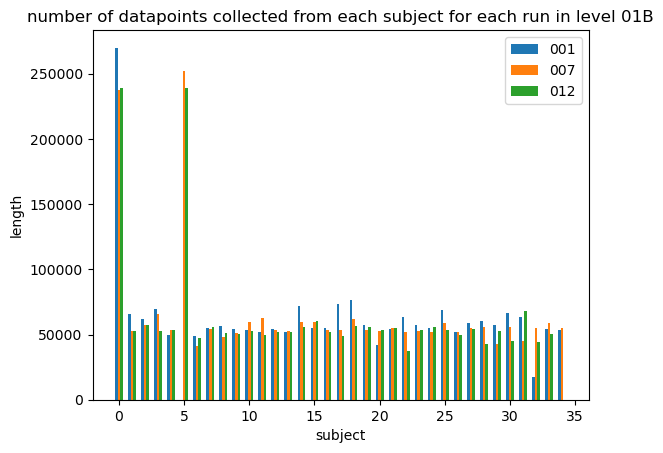

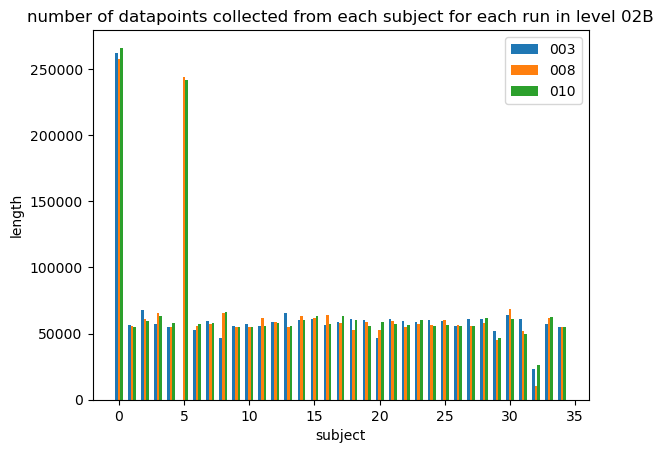

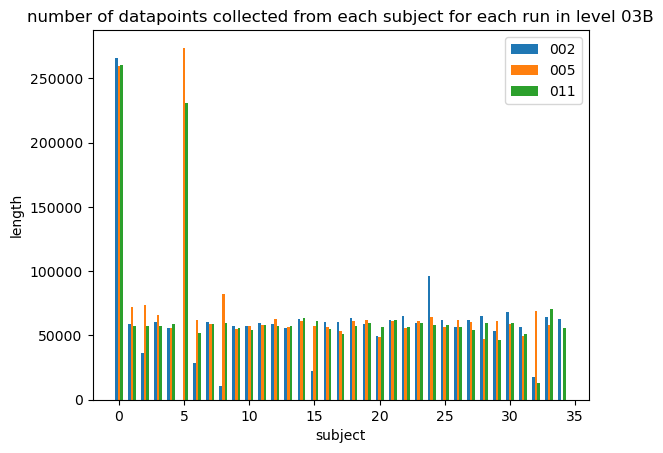

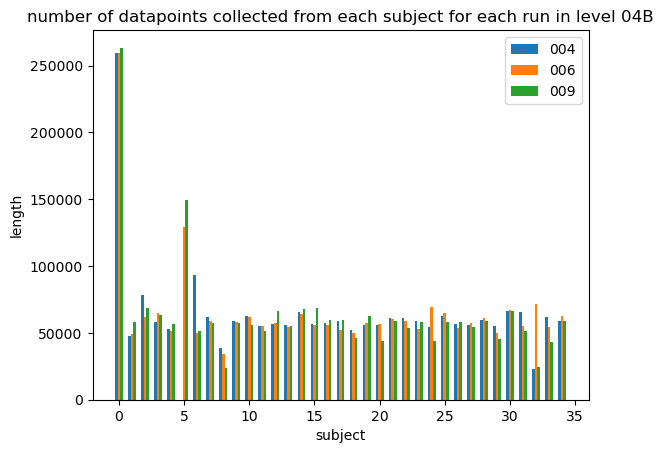

In [10]:
for lvl in ["01B", "02B", "03B", "04B"]:
  plt_compare_datum_len(lvl, df_plt)


<function matplotlib.pyplot.show(close=None, block=None)>

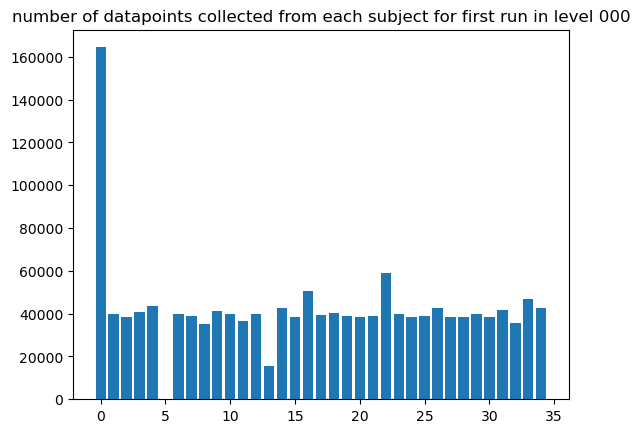

In [11]:
df_temp = df_plt[(df_plt["level"]=="000")&(df_plt["run"]=="001")]
x = np.arange(len(df_temp["subject"].unique()))
plt.bar(x, df_temp["len"])
plt.title(f"number of datapoints collected from each subject for first run in level 000")
plt.show

We note that
- for CP009, all the first run of each level (including 000 rest), there's only 1 value
- for CP030, there's only 2 rounds of level 3B 
- for CP031, there's 4 rounds of level 2B, but only 2 rounds of level 1B. All others have 3 rounds of each

In addition, while length of each run is expected to be different due to different time to land the aircraft, subject 0 (cp003) and subject 6 (cp009) needs to be looked into to see why they are so different

In [12]:
# cp003
cp003_run001_dfresp = plotData.loadTimeSeries("..\dataPackage", 
                                              "sub-cp003", 
                                              "ses-20210206", 
                                              "task-ils", 
                                              "lslshimmerresp", 
                                              "level-01B_run-001");                                           
cp003_run001_dfresp['time_dn'] = pd.to_datetime(cp003_run001_dfresp['time_dn']-719529, unit='D')

print(cp003_run001_dfresp.loc[1,"time_dn"]- cp003_run001_dfresp.loc[0,"time_dn"])
print(cp003_run001_dfresp.loc[2,"time_dn"]- cp003_run001_dfresp.loc[1,"time_dn"])
# 512 hz
print(cp003_run001_dfresp.loc[511,"time_dn"]- cp003_run001_dfresp.loc[0,"time_dn"])

0 days 00:00:00.001971456
0 days 00:00:00.001991680
0 days 00:00:01.013100544


In [13]:
# cp004
cp004_run001_dfresp = plotData.loadTimeSeries("..\dataPackage", 
                                              "sub-cp004", 
                                              "ses-20210330", 
                                              "task-ils", 
                                              "lslshimmerresp", 
                                              "level-01B_run-001");                                           
cp004_run001_dfresp['time_dn'] = pd.to_datetime(cp004_run001_dfresp['time_dn']-719529, unit='D')

print(cp004_run001_dfresp.loc[1,"time_dn"]- cp004_run001_dfresp.loc[0,"time_dn"])
print(cp004_run001_dfresp.loc[2,"time_dn"]- cp004_run001_dfresp.loc[1,"time_dn"])
# 128 hz
print(cp004_run001_dfresp.loc[127,"time_dn"]- cp004_run001_dfresp.loc[0,"time_dn"])

0 days 00:00:00.007825408
0 days 00:00:00.007805184
0 days 00:00:00.993004032


In [14]:
# cp009
cp009_run007_dfresp = plotData.loadTimeSeries("..\dataPackage", 
                                              "sub-cp009", 
                                              "ses-20210129", 
                                              "task-ils", 
                                              "lslshimmerresp", 
                                              "level-01B_run-007");    # NOTE THAT WE CHANGE TO 2ND RUN                                        
cp009_run007_dfresp['time_dn'] = pd.to_datetime(cp009_run007_dfresp['time_dn']-719529, unit='D')
cp009_run007_dfresp
print(cp009_run007_dfresp.loc[1,"time_dn"]- cp009_run007_dfresp.loc[0,"time_dn"])
print(cp009_run007_dfresp.loc[2,"time_dn"]- cp009_run007_dfresp.loc[1,"time_dn"])
# 512 hz
print(cp009_run007_dfresp.loc[511,"time_dn"]- cp009_run007_dfresp.loc[0,"time_dn"])

0 days 00:00:00.001961472
0 days 00:00:00.001981440
0 days 00:00:01.010032896


In [15]:
# cp009
cp011_run001_dfresp = plotData.loadTimeSeries("..\dataPackage", 
                                              "sub-cp011", 
                                              "ses-20210408", 
                                              "task-ils", 
                                              "lslshimmerresp", 
                                              "level-01B_run-001");    # NOTE THAT WE CHANGE TO 2ND RUN                                        
cp011_run001_dfresp['time_dn'] = pd.to_datetime(cp011_run001_dfresp['time_dn']-719529, unit='D')
cp011_run001_dfresp
print(cp011_run001_dfresp.loc[1,"time_dn"]- cp011_run001_dfresp.loc[0,"time_dn"])
print(cp011_run001_dfresp.loc[2,"time_dn"]- cp011_run001_dfresp.loc[1,"time_dn"])
# 128 hz
print(cp011_run001_dfresp.loc[127,"time_dn"]- cp011_run001_dfresp.loc[0,"time_dn"])

0 days 00:00:00.007805440
0 days 00:00:00.007815168
0 days 00:00:00.992390656


We have to sample down the frequency for CP003 and CP009 from 500+ to 128hz to match everyone

## Ignore as we will be using the cleaned signal

In [16]:
# # Downsample and convert datenum to datetime
# for root, dirs, files in os.walk("..\\dataPackage\\"):
#   for file in files:
#     try:
#       if 'lslshimmerresp' in file and 'dat.csv' in file:
#         if 'cp003' in file or 'cp009' in file:
#           df_temp = pd.read_csv(os.path.join(root, file))
#           df_temp['time_dn'] = pd.to_datetime(df_temp['time_dn']-719529, unit='D')
#           # convert to 128hz
#           df_temp = df_temp.resample(str(1/128)+'S', on="time_dn").first().set_index('time_dn')
#           df_temp.to_csv(f"..\\myCleanedData\\{file}")
#         else:
#           #just convert datenum to date and then save to new folder
#           df_temp = pd.read_csv(os.path.join(root, file))
#           df_temp['time_dn'] = pd.to_datetime(df_temp['time_dn']-719529, unit='D')
#           df_temp.to_csv(f"..\\myCleanedData\\{file}", index=False)
#     except:
#       print(file)

In [17]:
# x = pd.read_csv("..\myCleanedData\sub-cp003_ses-20210206_task-rest_stream-lslshimmerresp_feat-chunk_level-000_run-001_dat.csv")
# x["respiration_trace_mV"][(np.abs(stats.zscore(x["respiration_trace_mV"])) < 3)]
# x["respiration_trace_mV"].mean()

## Get mean of resting resp

In [18]:
# Get the mean value of all subjects resting resp
df_resting_resp_before = {'subject':[], 'mean_rest_resp':[]}
for root, dirs, files in os.walk("..\\cleanedData\\"):
  for file in files:
    if "lslshimmerresp" in file and "000" in file and "_1.csv" in file:
      subject = re.search("000_(cp\d+)", file).group(1)
      df_temp = pd.read_csv(os.path.join(root, file))
      # remove any outlier that is more than 3sd away from mean
      df_temp["respiration_trace_mV"] = df_temp["respiration_trace_mV"][(np.abs(stats.zscore(df_temp["respiration_trace_mV"])) < 3)]
  
      df_resting_resp_before['subject'].append(subject)
      df_resting_resp_before['mean_rest_resp'].append(df_temp["respiration_trace_mV"].mean())
pd.DataFrame(df_resting_resp_before)

,subject,mean_rest_resp
0,cp003,463.393803
1,cp004,64.027978
2,cp005,91.776699
3,cp006,61.494113
4,cp008,61.179824
5,cp009,NaN
6,cp011,60.433167
7,cp012,63.415219
8,cp013,62.085760
9,cp014,5.335073


Ask aaron, 
- is there anything wrong in the mean data?
- does it make sense to take the difference of activity - rest?
Ask XY
- cp006 missing

<BarContainer object of 263 artists>

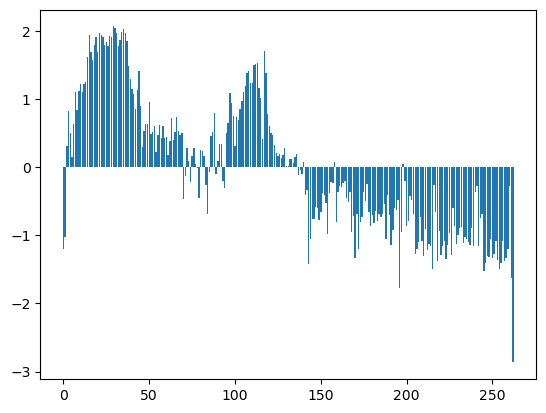

In [19]:
# visualise scaled data for cp003
scaler = StandardScaler()
df_temp = pd.read_csv("..\cleanedData\lslshimmerresp_respiration_trace_mV_01B_cp003_1.csv")
plt.bar(x =np.arange(len(df_temp['respiration_trace_mV'][::100])), height = scaler.fit_transform(df_temp[['respiration_trace_mV']][::100]).flatten())

In [20]:
# combine into single df
# Get the mean value of all subjects resting resp
df_combined = {'normalised_resp':[], 'difficulty':[]}
for root, dirs, files in os.walk("..\\cleanedData\\"):
  for file in files:
      difficulty = re.search("mV_(\d\d\w)", file).group(1)
      df_temp = pd.read_csv(os.path.join(root, file))
      # We perform scaler on EACH subject as they are independent of each other 
      scaler = StandardScaler()
      resp_series = pd.Series(scaler.fit_transform(df_temp[['respiration_trace_mV']]).flatten())
      

      df_combined['normalised_resp'].append(resp_series)
      df_combined['difficulty'].append(difficulty)
df_combined = pd.DataFrame(df_combined)
df_combined

,normalised_resp,difficulty
0,0 0.537798 1 1.355889 2 1...,000
1,0 0.594060 1 -0.807972 2 -0...,000
2,0 -4.419206 1 -7.639396 2 -9...,000
3,0 -0.054166 1 -0.039241 2 -0...,000
4,0 0.119080 1 0.846695 2 1...,000
...,...,...
470,0 -0.207633 1 -0.729086 2 -0...,04B
471,0 0.645447 1 0.768728 2 0...,04B
472,0 -1.235129 1 -0.476305 2 0...,04B
473,0 0.262705 1 0.125124 2 0...,04B


In [21]:
df_combined.to_csv("..\\cleanedData\\df_combined.csv")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_combined["normalised_resp"], df_combined["difficulty"], random_state=42)

# Modelling

In [23]:
model_result = {
  "classifier":[],
  "accuracy_score":[],
  "AUC_score":[],
  "F1_score":[]
}

def log_result(classifier, y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  model_result["classifier"].append(classifier)
  model_result["accuracy_score"].append(acc)
  model_result["AUC_score"].append(auc)
  model_result["F1_score"].append(f1)

  display(pd.DataFrame(model_result))

## KNeighborsTimeSeriesClassifier

In [24]:
# identify classifiers that support unequal length
from sktime.registry import all_estimators

# search for all classifiers which can handle unequal length data. This may give some
# UserWarnings if soft dependencies are not installed.
all_estimators(
    filter_tags={"capability:unequal_length": True}, estimator_types="classifier"
)

[('DummyClassifier', sktime.classification.dummy._dummy.DummyClassifier),
 ('KNeighborsTimeSeriesClassifier',
  sktime.classification.distance_based._time_series_neighbors.KNeighborsTimeSeriesClassifier)]

In [25]:
# only classifier in sktime that can process unequal length data
# https://github.com/sktime/sktime/issues/3649#issuecomment-1292459843
from sktime.alignment.dtw_python import AlignerDTW
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels.compose_from_align import DistFromAligner
aligner = AlignerDTW()
dtw_dist = DistFromAligner(aligner)
knclassifier = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance = dtw_dist, n_jobs= -1)
knclassifier.fit(pd.DataFrame(X_train), y_train)
y_pred = knclassifier.predict(pd.DataFrame(X_test))

log_result('KNeighborsTimeSeriesClassifier',y_test, y_pred)

KeyboardInterrupt: 

In [ ]:
# otherwise, we have to use paddingtransformer to process the unequal length
from sktime.classification.feature_based import RandomIntervalClassifier
from sktime.transformations.panel.padder import PaddingTransformer

padded_clf = PaddingTransformer() * RandomIntervalClassifier(n_intervals=5, n_jobs=-1)
padded_clf.fit(pd.DataFrame(X_train), y_train)
y_pred = padded_clf.predict(pd.DataFrame(X_test))

log_result('RandomIntervalClassifier',y_test, y_pred)

KeyboardInterrupt: 

In [ ]:
np.fft.ifft(X_lpf,axis=0)

In [ ]:
# catch22 = Catch22()
# catch22.fit_transform(scaler.fit_transform(df_temp[['respiration_trace_mV']][::100]).flatten())

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.839084,0.45588,355.0,0.91691,-0.804665,52.0,5.0,0.86359,0.024544,0.524628,...,4.0,0.671533,6.0,1.60022,0.010101,0.123709,0.659574,0.808511,0.027778,5.0


In [ ]:
# https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.transformations.panel.catch22.Catch22.html
from sktime.transformations.panel.catch22 import Catch22
catch22 = Catch22()
catch22.fit_transform(df_temp['respiration_trace_mV'])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,464.062286,464.033569,33143.0,0.000015,0.0,5180.0,462.0,0.004506,0.00024,0.003195,...,40.0,0.000029,35.0,1.392798,0.000101,10.155534,0.3,0.34,0.055556,0.0


In [ ]:
# Attempt to do baseline modeling


- take a delta of the test vs the rest
- then feed it into the model